<a href="https://colab.research.google.com/github/AeroEng16/FootballAnalysis/blob/main/lineDetectionAndHomography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [14]:
import cv2
import numpy as np
import math
import plotly.express as px
import pandas as pd

In [15]:
vid = cv2.VideoCapture("/content/drive/MyDrive/ML/FootballAnalysis/08fd33_4.mp4")

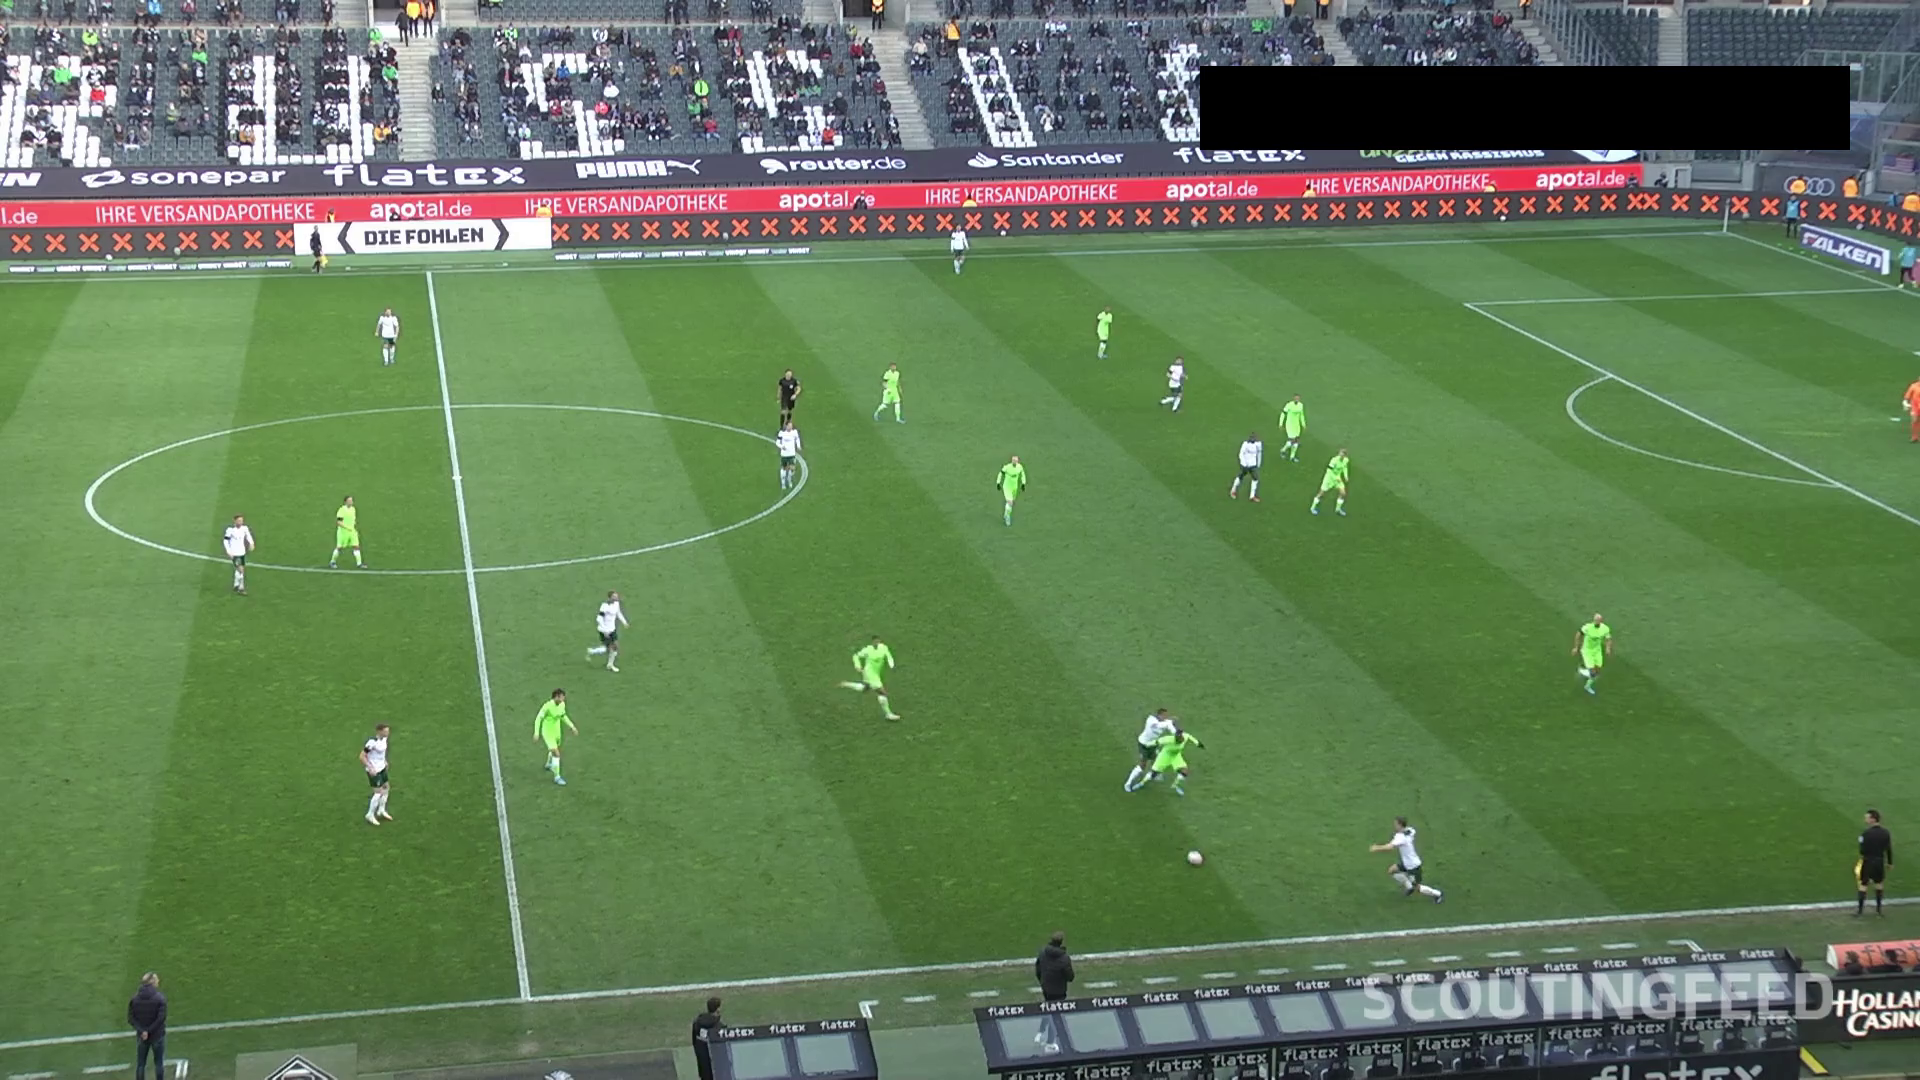

In [25]:
ret, frame = vid.read()

cv2_imshow(frame)

In [26]:
#hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
#mask_green = cv2.inRange(hsv, (36, 25, 25), (86, 255, 255)) # green mask to select only the field
#frame_masked = cv2.bitwise_and(frame, frame, mask=mask_green)

#gray = cv2.cvtColor(frame_masked, cv2.COLOR_RGB2GRAY)
#_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#lsd=cv2.createLineSegmentDetector(0)
#canny = cv2.Canny(gray, 50, 150, apertureSize=3)
## Hough line detection
#lines = cv2.HoughLinesP(canny, 1, np.pi / 180, 50, None, 50, 20)
## Line segment detection
#lines_lsd = lsd.detect(canny)[0]

In [18]:
#drawn_img = lsd.drawSegments(frame,lines_lsd)
#cv2_imshow(drawn_img)

In [27]:
lines_lsd
vectors = []
for line in lines_lsd:

  distance = [line[0][2] - line[0][0], line[0][3] - line[0][1]]

  norm = math.sqrt(distance[0] ** 2 + distance[1] ** 2)
  vectors.append([distance[0] / norm, distance[1] / norm])



In [28]:
df = pd.DataFrame(vectors, columns=['x', 'y'])
df.head()

x         y
0 -0.999921 -0.012574
1  0.999655 -0.026253
2  0.972166  0.234294
3  0.999385  0.035062
4  0.999613 -0.027802

In [29]:
from PIL import Image
im = Image.fromarray(frame)
im.save("test.png")

In [22]:
try:
  import supervision as sv
  from inference import get_model
except ImportError:
  !pip install inference supervision
  import supervision as sv
  from inference import get_model


In [30]:
import supervision as sv
from inference import get_model
import cv2
import numpy as np
model = get_model(
    model_id="football-field-detection-f07vi/14",
    api_key="Sjv2KA46fn0Ksxphg6NV"
)

image = cv2.imread("test.png")
result = model.infer(image, confidence=0.3)[0]

keypoints = sv.KeyPoints.from_inference(result)

filter = keypoints.confidence > 0.5
keypoints.xy = keypoints.xy[filter][np.newaxis]
keypoints.confidence = keypoints.confidence[filter][np.newaxis]

vertex_annotator = sv.VertexAnnotator(radius=12)
annotated_image = vertex_annotator.annotate(image.copy(), keypoints)

In [36]:
try:
  from ultralytics import YOLO
except ModuleNotFoundError:
  !pip install ultralytics
  from ultralytics import YOLO

# Load a pretrained YOLO11n model
modelPlayers = YOLO("/content/drive/MyDrive/ML/FootballAnalysis/Models/bestFootballYoloSoFar.pt")

# Run inference on 'bus.jpg' with arguments
modelPlayers.predict("test.png", save=True, conf=0.5)

modelBall = YOLO("/content/drive/MyDrive/ML/FootballAnalysis/Models/bestBallSoFar_0409.pt")

modelBall.predict("test.png", save=True, conf=0.1)


image 1/1 /content/test.png: 384x640 23 players, 1 referee, 315.0ms
Speed: 4.0ms preprocess, 315.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict

image 1/1 /content/test.png: 384x640 2 balls, 5236.3ms
Speed: 8.5ms preprocess, 5236.3ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ball'}
 obb: None
 orig_img: array([[[105, 146, 100],
         [ 98, 139,  93],
         [101, 150,  97],
         ...,
         [ 82,  92, 100],
         [ 85,  95, 103],
         [ 87,  97, 105]],
 
        [[104, 145,  99],
         [105, 146, 100],
         [114, 163, 110],
         ...,
         [ 87,  97, 105],
         [ 89,  99, 107],
         [ 90, 100, 108]],
 
        [[101, 150,  97],
         [110, 159, 106],
         [115, 172, 114],
         ...,
         [ 88,  98, 106],
         [ 90, 100, 108],
         [ 92, 102, 110]],
 
        ...,
 
        [[ 78, 103,  74],
         [ 78, 103,  74],
         [ 78, 103,  74],
         ...,
         [ 43,  47,  30],
         [ 44,  48,  31],
         [ 44,  48,  31]],
 
        [[ 78, 103,  74],
         [ 78, 103,  74],
         [ 78, 103,  74],
         ...,
         [ 55,  56, 

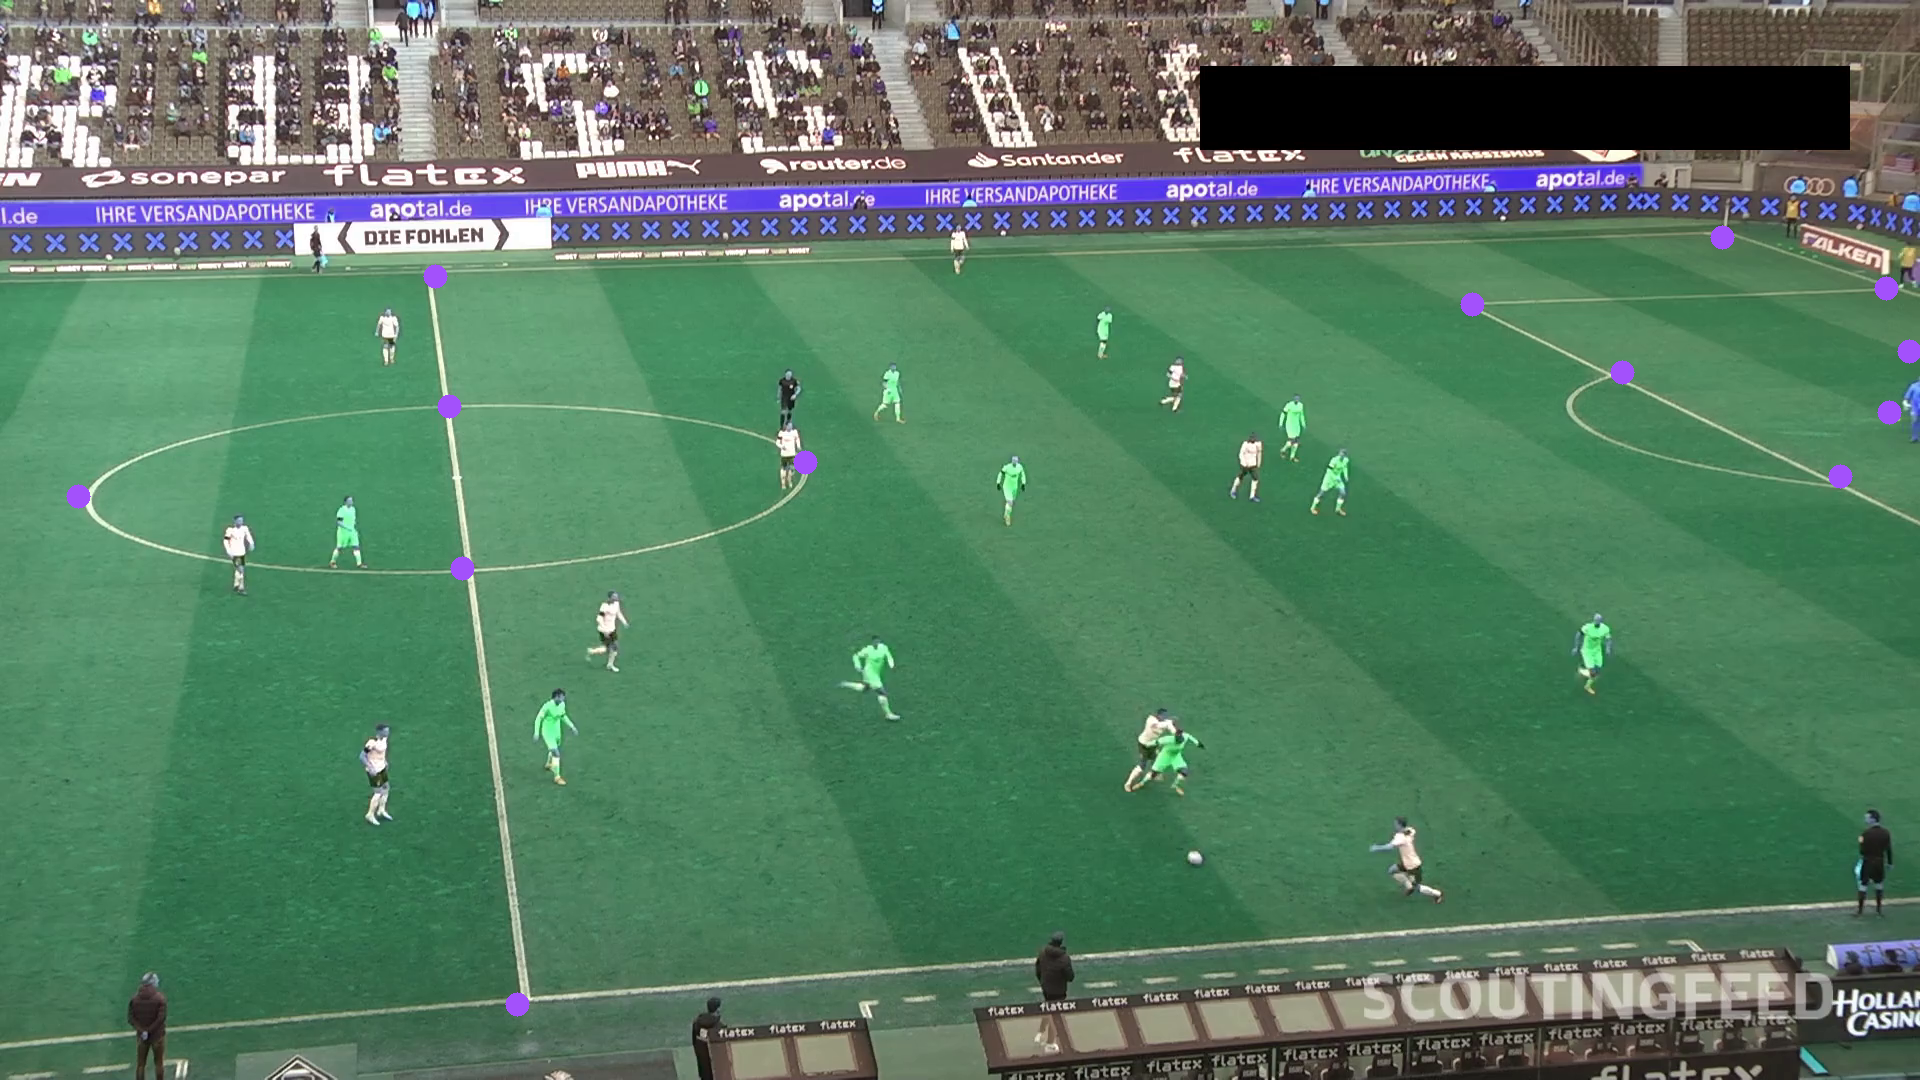

In [31]:
from google.colab.patches import cv2_imshow
cv2_imshow(annotated_image)

In [41]:
!pip install -q git+https://github.com/roboflow/sports.git

KeypointsDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=1920, height=1080), predictions=[KeypointsPrediction(x=960.0, y=640.5, width=1918.0, height=837.0, confidence=0.9837862253189087, class_name='pitch', class_confidence=None, class_id=0, tracker_id=None, detection_id='5c237439-aed3-4c7f-865a-f383d61c21a0', parent_id=None, keypoints=[Keypoint(x=0.0, y=312.0, confidence=1.2248754501342773e-05, class_id=0, class_name='01'), Keypoint(x=0.0, y=362.0, confidence=6.258487701416016e-07, class_id=1, class_name='02'), Keypoint(x=0.0, y=427.0, confidence=8.940696716308594e-08, class_id=2, class_name='03'), Keypoint(x=0.0, y=588.0, confidence=0.0, class_id=3, class_name='04'), Keypoint(x=0.0, y=640.0, confidence=0.0, class_id=4, class_name='05'), Keypoint(x=936.0, y=643.0, confidence=5.960464477539063e-08, class_id=5, class_name='06'), Keypoint(x=0.0, y=433.0, confidence=3.5762786865234375e-07, class_id=6, class_nam